In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris

iris_dataset = load_iris() # Irisデータ読み込み
print(iris_dataset)


{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [4]:
# 訓練データとテストデータに分割（train:test=70%:30%）
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
        iris_dataset['data'], iris_dataset['target'],
        test_size=0.3, random_state=0)

In [5]:
# Pandasデータフレーム作成（訓練データの内容確認用）
iris_df = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
iris_df['species'] = y_train

In [6]:
# 訓練データの件数確認
print('tarin data',len(iris_df))
print('0:setosa ',len(iris_df[iris_df['species']==0]))
print('1:versicolor ', len(iris_df[iris_df['species']==1]))
print('2:virginica', len(iris_df[iris_df['species']==2]))

tarin data 105
0:setosa  34
1:versicolor  32
2:virginica 39


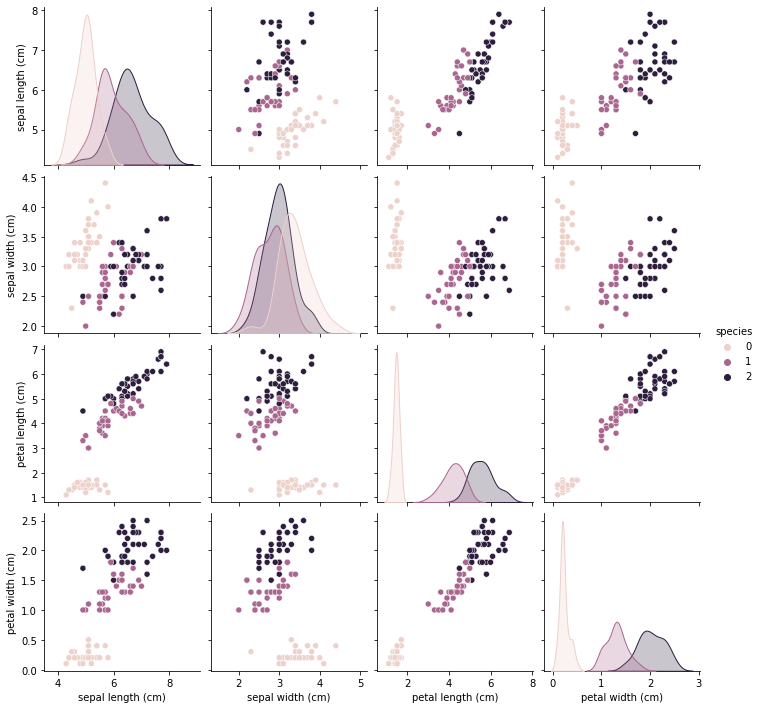

In [8]:
# 訓練データをグラフで可視化
import seaborn as sns
sns.pairplot(iris_df, hue='species')

In [9]:
# モデル設定と訓練データを使った学習
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=3) # 決定木モデル（最大深さ3）
clf = clf.fit(X_train, y_train) # 訓練データで学習

In [10]:
# 訓練データでの正解率（学習検証）
from sklearn import metrics
predict_train = clf.predict(X_train)
ac_score = metrics.accuracy_score(y_train, predict_train)
print('train score: {0:.2f}%'.format(ac_score * 100))

train score: 98.10%


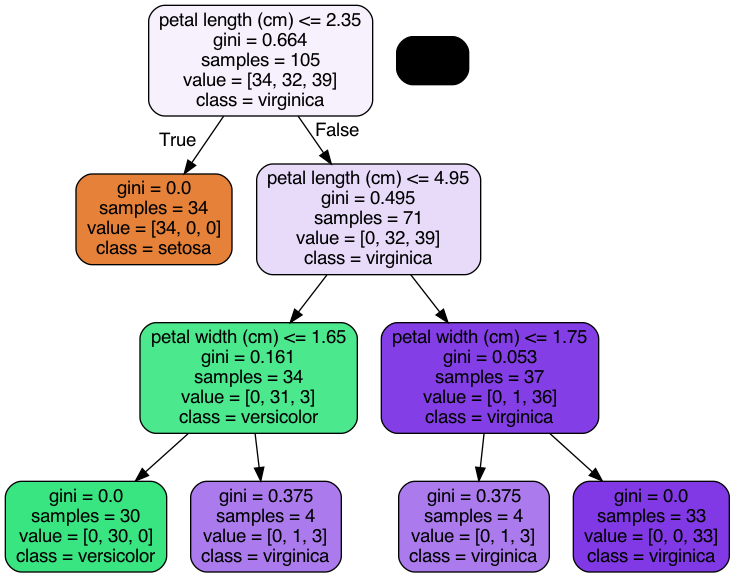

In [24]:
# 作成された決定木モデルを可視化
import pydotplus
from six import StringIO
from IPython.display import Image
dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data,
                     feature_names=iris_dataset.feature_names,
                     class_names=iris_dataset.target_names,
                     filled=True, rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [25]:
print(iris_dataset.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
